In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [20]:
#loading dataset
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/Housing.csv")

In [21]:
print("First 5 rows:")
print(df.head())

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [22]:
#Data Overview
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [23]:

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

    

In [25]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [27]:
#Encoding categorical data (if needed)
# Example: encoding 'mainroad', 'guestroom', etc. if present as yes/no
df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)



In [28]:
# Feature Selection
# SIMPLE: Predicting 'price' based on 'area'
X_simple = df[['area']]
y = df['price']

# MULTIPLE: Predicting 'price' using multiple relevant features
X_multiple = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

In [29]:
# 6. Train-Test Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


In [30]:
# Model Training
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

model_m = LinearRegression()
model_m.fit(X_train_m, y_train_m)


LinearRegression()

In [31]:
#Predictions
y_pred_s = model_s.predict(X_test_s)
y_pred_m = model_m.predict(X_test_m)


In [32]:
#Evaluation
def evaluate(y_true, y_pred, model_name):
    print(f"\n📊 Evaluation - {model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate(y_test_s, y_pred_s, "Simple Linear Regression")
evaluate(y_test_m, y_pred_m, "Multiple Linear Regression")


📊 Evaluation - Simple Linear Regression
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644

📊 Evaluation - Multiple Linear Regression
MAE: 1127483.3523235186
MSE: 2292721545725.3613
R² Score: 0.5464062355495873


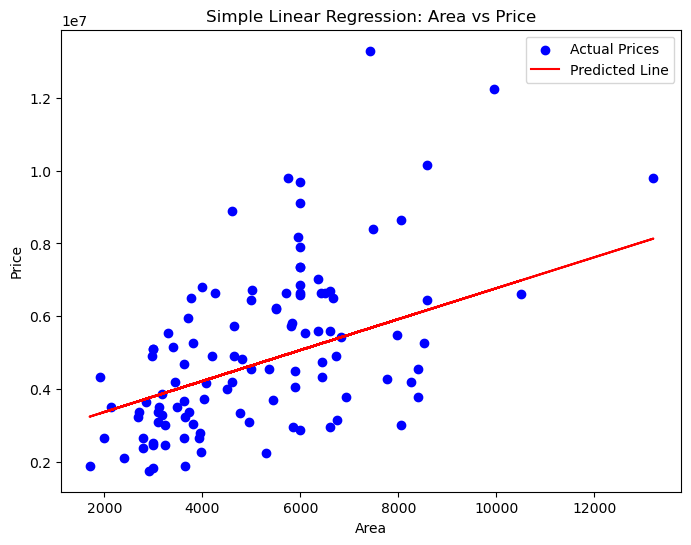

In [33]:
#Visualization - Simple Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Prices')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted Line')
plt.title("Simple Linear Regression: Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()


In [34]:

#Coefficient Interpretation
print("\n🔍 Coefficient Interpretation - Simple")
print(f"Intercept: {model_s.intercept_}")
print(f"Coefficient (Area): {model_s.coef_[0]}")

print("\n🔍 Coefficient Interpretation - Multiple")
coeff_df = pd.DataFrame({'Feature': X_multiple.columns, 'Coefficient': model_m.coef_})
print(coeff_df)



🔍 Coefficient Interpretation - Simple
Intercept: 2512254.2639593435
Coefficient (Area): 425.72984193878284

🔍 Coefficient Interpretation - Multiple
     Feature   Coefficient
0       area  3.088670e+02
1   bedrooms  1.512468e+05
2  bathrooms  1.185732e+06
3    stories  4.951008e+05
4    parking  3.376608e+05
